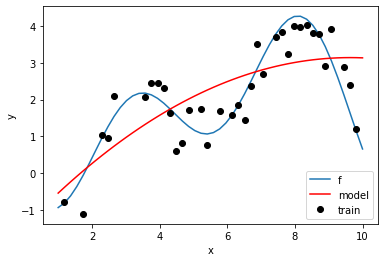

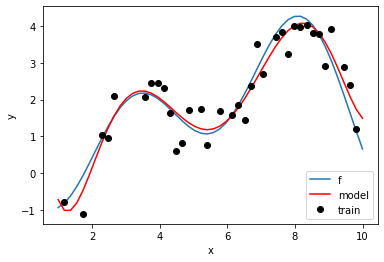

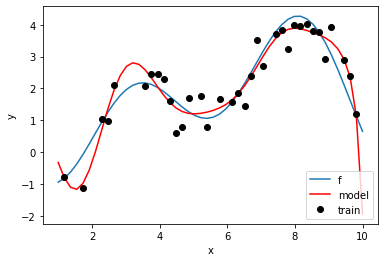

In [16]:
#Prepravite skriptu tako da rezultat izvođenja skripte bude sljedeći:
#- vektori MSEtrain i MSEtest koji sadrži srednju kvadratnu pogrešku na podacima za učenje i podacima za testiranje
#za tri različita stupnja dodatnih veličina u modelu (npr., degree= 2, 6 i 15)

#- slika na kojoj je usporedba izlaza modela za tri različita stupnja dodatnih veličina u modelu (npr., degree 2, 6 i
#15) s pozadinskom funkcijom koja je generirala podatke
#Što se događa s ovim rezultatima ako je na raspolaganju veći odnosno manji broj uzoraka za učenje?

import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model as lm
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

def non_func(x):
 y = 1.6345 - 0.6235*np.cos(0.6067*x) - 1.3501*np.sin(0.6067*x) - 1.1622 * np.cos(2*x*0.6067) - 0.9443*np.sin(2*x*0.6067)
 return y
def add_noise(y):
 np.random.seed(14)
 varNoise = np.max(y) - np.min(y)
 y_noisy = y + 0.1*varNoise*np.random.normal(0,1,len(y))
 return y_noisy

x = np.linspace(1,10,50) #mijenjanje broja uzoraka za učenje
y_true = non_func(x)
y_measured = add_noise(y_true)
x = x[:, np.newaxis]
y_measured = y_measured[:, np.newaxis]

MSEs_train = []
MSEs_test = []

# make polynomial features
degrees = [2,6,15]
for i in range(len(degrees)):    
    poly = PolynomialFeatures(degree=degrees[i])
    xnew = poly.fit_transform(x)

    np.random.seed(12)
    indeksi = np.random.permutation(len(xnew))
    indeksi_train = indeksi[0:int(np.floor(0.7*len(xnew)))]
    indeksi_test = indeksi[int(np.floor(0.7*len(xnew)))+1:len(xnew)]
    xtrain = xnew[indeksi_train,]
    ytrain = y_measured[indeksi_train]
    xtest = xnew[indeksi_test,]
    ytest = y_measured[indeksi_test]

    linearModel = lm.LinearRegression()
    linearModel.fit(xtrain,ytrain)
    
    ytrain_p = linearModel.predict(xtrain)
    ytest_p = linearModel.predict(xtest)
    MSEs_train.append(mean_squared_error(ytrain, ytrain_p))
    MSEs_test.append(mean_squared_error(ytest, ytest_p))
    
    #pozadinska funkcija vs model
    plt.figure(i)
    plt.plot(x,y_true,label='f')
    plt.plot(x, linearModel.predict(xnew),'r-',label='model')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.plot(xtrain[:,1],ytrain,'ok',label='train')
    plt.legend(loc = 4)

In [17]:
print(MSEs_train) #MSE_train for first degree, second and then third degree
print(MSEs_test) #MSE_test for first degree, second and then third degree

[0.7579630147780274, 0.19556471929763775, 0.14480085702154352]
[1.2745083887453066, 0.3115703410217154, 0.7039057376630612]
